# Classifying Location Crime Level Using K-Nearest Neigbour Classification Model

## Data Gathering and Processing

In [2]:
# Import Required Libraries for Data Gathering and Processing

import pandas as pd # library for data analsysis
import requests # library to handle request
import numpy as np # library to handle array data

import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Plotting
%matplotlib inline

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import json # library to handle JSON files

from sklearn.preprocessing import StandardScaler # Standarising data

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap

import geopy.distance  # Calculates if point with radius

# Model Processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # Import library to allow determination of best K
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

print('Required Libraries imported.')

Required Libraries imported.


 ---

## 1. Retrieve Crime Data

Download and process data relating to crimes

 ---

In [3]:
# Extract data from CSV file and convert to DataFrame

file = project.get_file("2019-08-west-yorkshire-street.csv")
dfcrime = pd.read_csv(file)
dfcrime.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2019-08,West Yorkshire Police,West Yorkshire Police,-1.550626,53.597400,On or near Swithen Hill,E01007359,Barnsley 005C,Anti-social behaviour,NaN,NaN
1,65762c5e54c3c0d6fc23d0bf2b0c30446f4f2f70b05c32...,2019-08,West Yorkshire Police,West Yorkshire Police,-1.453707,53.574284,On or near Construction Way,E01007327,Barnsley 007E,Violence and sexual offences,Under investigation,NaN
2,NaN,2019-08,West Yorkshire Police,West Yorkshire Police,-1.863065,53.939035,On or near Low Mill,E01010646,Bradford 001A,Anti-social behaviour,NaN,NaN
3,NaN,2019-08,West Yorkshire Police,West Yorkshire Police,-1.876367,53.942950,On or near Croft House Fold,E01010646,Bradford 001A,Anti-social behaviour,NaN,NaN
4,cebedd6b5b74e7538058ec863930c7fe38d9f34253fa05...,2019-08,West Yorkshire Police,West Yorkshire Police,-1.875495,53.944297,On or near Wharfe Park,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN


In [6]:
# Filter crimes relating to the Leeds area only

dfleedscrimes =dfcrime[dfcrime['LSOA name'].str.contains('Leeds', na=False)]
dfleedscrimes.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
14365,NaN,2019-08,West Yorkshire Police,West Yorkshire Police,-1.385945,53.937392,On or near North Grove Road,E01011698,Leeds 001A,Anti-social behaviour,NaN,NaN
14366,NaN,2019-08,West Yorkshire Police,West Yorkshire Police,-1.386787,53.939131,On or near Appleby Way,E01011698,Leeds 001A,Anti-social behaviour,NaN,NaN
14367,49d54c17930004334406b57454c511aa670d58f972d990...,2019-08,West Yorkshire Police,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,E01011698,Leeds 001A,Burglary,Investigation complete; no suspect identified,NaN
14368,ea174e6504d47de3208f61064920785a06b02398883e07...,2019-08,West Yorkshire Police,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Other theft,Under investigation,NaN
14369,92bd06496f9817c59c25a77b7a62195e36424503a20d5d...,2019-08,West Yorkshire Police,West Yorkshire Police,-1.386787,53.939131,On or near Appleby Way,E01011698,Leeds 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN


In [7]:
# Remove non-required columns

dfleedscrimes.drop(dfleedscrimes.columns[[0,1,2,3,6,10,11]], axis = 1, inplace=True)
dfleedscrimes.head()

,Longitude,Latitude,LSOA code,LSOA name,Crime type
14365,-1.385945,53.937392,E01011698,Leeds 001A,Anti-social behaviour
14366,-1.386787,53.939131,E01011698,Leeds 001A,Anti-social behaviour
14367,-1.388671,53.935321,E01011698,Leeds 001A,Burglary
14368,-1.391328,53.938003,E01011698,Leeds 001A,Other theft
14369,-1.386787,53.939131,E01011698,Leeds 001A,Violence and sexual offences


In [8]:
# check for missing values

dfnull = dfleedscrimes.isnull().sum()
dfnull

Longitude     0
Latitude      0
LSOA code     0
LSOA name     0
Crime type    0
dtype: int64

In [9]:
# Re-order Columns and rest index

dfleedscrimes = dfleedscrimes[['LSOA code', 'LSOA name', 'Crime type', 'Longitude', 'Latitude']]
dfleedscrimes.reset_index(inplace = True)
dfleedscrimes.drop(dfleedscrimes.columns[[0]], axis = 1, inplace=True)
dfleedscrimes.head()

,LSOA code,LSOA name,Crime type,Longitude,Latitude
0,E01011698,Leeds 001A,Anti-social behaviour,-1.385945,53.937392
1,E01011698,Leeds 001A,Anti-social behaviour,-1.386787,53.939131
2,E01011698,Leeds 001A,Burglary,-1.388671,53.935321
3,E01011698,Leeds 001A,Other theft,-1.391328,53.938003
4,E01011698,Leeds 001A,Violence and sexual offences,-1.386787,53.939131


In [10]:
# Check data types

dfleedscrimes.dtypes

LSOA code      object
LSOA name      object
Crime type     object
Longitude     float64
Latitude      float64
dtype: object

In [11]:
# DataFrame Shape

dfleedscrimes.shape

(10441, 5)

In [13]:
# Save DataFrame to DataBase

%sql drop table dfleedscrimes
%sql PERSIST dfleedscrimes

 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB


'Persisted dfleedscrimes'

In [9]:
# Check that data has been saved successfully

query = %sql SELECT * FROM dfleedscrimes;
dftest = query.DataFrame()
dftest.head()

 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


,index,LSOA code,LSOA name,Crime type,Longitude,Latitude
0,0,E01011698,Leeds 001A,Anti-social behaviour,-1.385945,53.937392
1,1,E01011698,Leeds 001A,Anti-social behaviour,-1.386787,53.939131
2,2,E01011698,Leeds 001A,Burglary,-1.388671,53.935321
3,3,E01011698,Leeds 001A,Other theft,-1.391328,53.938003
4,4,E01011698,Leeds 001A,Violence and sexual offences,-1.386787,53.939131


 ---
    
## 2. Leeds Area Data

Download and process data relating to area names and geographic location of points

 ---

In [15]:
# Get Data relating to Leeds Areas

file = project.get_file("Lower_Layer_Super_Output_Areas_December_2011_Names_and_Codes_in_England_and_Wales.csv")
dfleedsareas = pd.read_csv(file)
dfleedsareas.head()

,LSOA11CD,LSOA11NM,FID
0,E01032945,Leeds 044F,3235
1,E01032876,Leeds 109G,3241
2,E01032946,Leeds 110G,3242
3,E01033002,Leeds 055F,3303
4,E01033003,Leeds 055G,3311


In [37]:
# Get Leeds Area Centroid Data

file = project.get_file("Lower_Layer_Super_Output_Areas_December_2011_Population_Weighted_Centroids.csv")
dfleedscentroids = pd.read_csv(file)
dfleedscentroids.rename(columns = {'lsoa11cd':'LSOA11CD'}, inplace = True) 
dfleedscentroids.head()

,X,Y,objectid,LSOA11CD,lsoa11nm
0,425803.285,442661.831,6164,E01032504,Leeds 007F
1,424936.797,438926.118,6166,E01032502,Leeds 017F
2,424436.105,443023.218,6167,E01032503,Leeds 007E
3,426509.387,433685.112,6168,E01032500,Leeds 067H
4,424688.965,439321.698,6169,E01032501,Leeds 017E


In [41]:
# Merge DataFrames

dfleedspoints = pd.merge(dfleedsareas, dfleedscentroids, on='LSOA11CD', how='inner')
dfleedspoints.head()

,LSOA11CD,LSOA11NM,FID,X,Y,objectid,lsoa11nm
0,E01032945,Leeds 044F,3235,427359.450,435944.805,8645,Leeds 044F
1,E01032876,Leeds 109G,3241,427390.868,438349.344,8211,Leeds 109G
2,E01032946,Leeds 110G,3242,428552.985,435844.632,8644,Leeds 110G
3,E01033002,Leeds 055F,3303,430406.340,434417.567,6369,Leeds 055F
4,E01033003,Leeds 055G,3311,430554.262,434423.195,6370,Leeds 055G


In [42]:
# Remove non required columns

dfleedspoints.drop(dfleedspoints.columns[[2,5,6]], axis = 1, inplace=True)
dfleedspoints.rename(columns = {'LSOA11CD':'LSOA Code'}, inplace = True) 
dfleedspoints.head()

,LSOA Code,LSOA11NM,X,Y
0,E01032945,Leeds 044F,427359.450,435944.805
1,E01032876,Leeds 109G,427390.868,438349.344
2,E01032946,Leeds 110G,428552.985,435844.632
3,E01033002,Leeds 055F,430406.340,434417.567
4,E01033003,Leeds 055G,430554.262,434423.195


In [43]:
dfleedspoints.shape

(482, 4)

In [44]:
# Get Leeds Area Wrad Name Data

file = project.get_file("Lower_Layer_Super_Output_Area_2011_to_Ward_2018_Lookup_in_England_and_Wales_v3.csv")
dfleedswardnames = pd.read_csv(file)
dfleedswardnames.drop(dfleedswardnames.columns[[1,4,5,6,7]], axis = 1, inplace=True)
dfleedswardnames.rename(columns = {'WD18NM':'Ward Name', 'LSOA11CD':'LSOA Code'}, inplace = True) 
dfleedswardnames.head()

,LSOA Code,WD18CD,Ward Name
0,E01011370,E05011386,Beeston & Holbeck
1,E01011357,E05011390,Chapel Allerton
2,E01033013,E05011386,Beeston & Holbeck
3,E01011354,E05011390,Chapel Allerton
4,E01033032,E05011386,Beeston & Holbeck


In [45]:
# Merge DataFrames

dfleedspoints = pd.merge(dfleedspoints, dfleedswardnames, on='LSOA Code', how='inner')
dfleedspoints.head()

,LSOA Code,LSOA11NM,X,Y,WD18CD,Ward Name
0,E01032945,Leeds 044F,427359.450,435944.805,E05011397,Headingley & Hyde Park
1,E01032876,Leeds 109G,427390.868,438349.344,E05011413,Weetwood
2,E01032946,Leeds 110G,428552.985,435844.632,E05011397,Headingley & Hyde Park
3,E01033002,Leeds 055F,430406.340,434417.567,E05011403,Little London & Woodhouse
4,E01033003,Leeds 055G,430554.262,434423.195,E05011403,Little London & Woodhouse


In [46]:
# Check for missing data

dfnull = dfleedspoints.isnull().sum()
dfnull

LSOA Code    0
LSOA11NM     0
X            0
Y            0
WD18CD       0
Ward Name    0
dtype: int64

In [47]:
# Dataframe shape

dfleedspoints.shape

(482, 6)

In [33]:
# Get Latitude Longitude of Leeds Points  - original data supplied in Northing and Easting format

file = project.get_file("Leeds LSOA Centroid Latitude Longitude Conversion.csv")
dfleedslatlon = pd.read_csv(file)
dfleedslatlon.head()


,LSOA Code,Latitude,Longitude
0,E01032504,53.879508,-1.608987
1,E01032502,53.845981,-1.622477
2,E01032503,53.882827,-1.629751
3,E01032500,53.798799,-1.599019
4,E01032501,53.849543,-1.626215


In [36]:
# Confirm Dataframe shape

dfleedslatlon.shape

(482, 3)

In [49]:
# Merge DataFrames

dfleedspoints = pd.merge(dfleedspoints, dfleedslatlon, on='LSOA Code', how='inner')
dfleedspoints.head()

,LSOA Code,LSOA11NM,X,Y,WD18CD,Ward Name,Latitude,Longitude
0,E01032945,Leeds 044F,427359.450,435944.805,E05011397,Headingley & Hyde Park,53.819059,-1.585914
1,E01032876,Leeds 109G,427390.868,438349.344,E05011413,Weetwood,53.840672,-1.585230
2,E01032946,Leeds 110G,428552.985,435844.632,E05011397,Headingley & Hyde Park,53.818096,-1.567803
3,E01033002,Leeds 055F,430406.340,434417.567,E05011403,Little London & Woodhouse,53.805166,-1.539784
4,E01033003,Leeds 055G,430554.262,434423.195,E05011403,Little London & Woodhouse,53.805211,-1.537536


In [51]:
# Remove non required columns

dfleedspoints.drop(dfleedspoints.columns[[2,3]], axis = 1, inplace=True)
dfleedspoints.head()

,LSOA Code,LSOA11NM,WD18CD,Ward Name,Latitude,Longitude
0,E01032945,Leeds 044F,E05011397,Headingley & Hyde Park,53.819059,-1.585914
1,E01032876,Leeds 109G,E05011413,Weetwood,53.840672,-1.585230
2,E01032946,Leeds 110G,E05011397,Headingley & Hyde Park,53.818096,-1.567803
3,E01033002,Leeds 055F,E05011403,Little London & Woodhouse,53.805166,-1.539784
4,E01033003,Leeds 055G,E05011403,Little London & Woodhouse,53.805211,-1.537536


In [52]:
# Save DataFrame to Database

#%sql drop table dfleedspoints

%sql PERSIST dfleedspoints

 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB


'Persisted dfleedspoints'

 ---

## 3. Retrieve Crimes Within 500m of Geographic Point

Create DataFrame containing details of crimes falling within a 500m radius of each geographic point

 ---

In [30]:
# Retrieve Geographic point data from Database

query = %sql SELECT * FROM dfleedspoints;
dfarealocations = query.DataFrame()
dfarealocations.head()

 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


,index,LSOA Code,lsoa11nm,wd18cd,Ward Name,Latitude,Longitude
0,0,E01032945,Leeds 044F,E05011397,Headingley & Hyde Park,53.819059,-1.585914
1,1,E01032876,Leeds 109G,E05011413,Weetwood,53.840672,-1.585230
2,2,E01032946,Leeds 110G,E05011397,Headingley & Hyde Park,53.818096,-1.567803
3,3,E01033002,Leeds 055F,E05011403,Little London & Woodhouse,53.805166,-1.539784
4,4,E01033003,Leeds 055G,E05011403,Little London & Woodhouse,53.805211,-1.537536


In [59]:
# Retrieve Crime Data from database

query = %sql SELECT * FROM dfleedscrimes;
dfleedscrime = query.DataFrame()
dfleedscrime.head()


 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


,index,LSOA code,LSOA name,Crime type,Longitude,Latitude
0,0,E01011698,Leeds 001A,Anti-social behaviour,-1.385945,53.937392
1,1,E01011698,Leeds 001A,Anti-social behaviour,-1.386787,53.939131
2,2,E01011698,Leeds 001A,Burglary,-1.388671,53.935321
3,3,E01011698,Leeds 001A,Other theft,-1.391328,53.938003
4,4,E01011698,Leeds 001A,Violence and sexual offences,-1.386787,53.939131


In [61]:
# Rename Column

dfleedscrime.rename(columns = {'Crime type':'CrimeType'}, inplace = True) 
dfleedscrime.head()

,index,LSOA code,LSOA name,CrimeType,Longitude,Latitude
0,0,E01011698,Leeds 001A,Anti-social behaviour,-1.385945,53.937392
1,1,E01011698,Leeds 001A,Anti-social behaviour,-1.386787,53.939131
2,2,E01011698,Leeds 001A,Burglary,-1.388671,53.935321
3,3,E01011698,Leeds 001A,Other theft,-1.391328,53.938003
4,4,E01011698,Leeds 001A,Violence and sexual offences,-1.386787,53.939131


In [7]:
# Create Function to determine if crime falls within radius of location point

def getNearbycrimes(names, names2, latitudes, longitudes, radius=500):
    
    crimes_list=[]
    for name, names2, lat, lng in zip(names, names2, latitudes, longitudes):
        # print(name, names2)
            
        
        
        for row in dfleedscrime.itertuples():
            # print(row.index, row.CrimeType,row.Latitude, row.Longitude)
        
            coords1 = (lat, lng)
            coords2 = (row.Latitude, row.Longitude)
        
        
            # if crime falls within radius then add to list
            if geopy.distance.distance(coords1, coords2).m <= radius:               
        
                # return information for each nearby venue
                crimes_list.append([
                    name,
                    names2,
                    lat, 
                    lng, 
                    row.index, 
                    row.CrimeType, 
                    row.Latitude,  
                    row.Longitude])
        
    # generate Data Frame    
    crimes_venues = pd.DataFrame(crimes_list)
    crimes_venues.columns = ['LSOA Code',
                  'Ward Name',           
                  'Latitude', 
                  'Longitude', 
                  'Crime Index',
                  'Crime Type',           
                  'Crime Latitude', 
                  'Crime Longitude']
    
    return(crimes_venues)            

In [8]:
# Create DataFrame containg details of crimes within radius of each geographic point

areacrimes = getNearbycrimes(names=dfarealocations['LSOA Code'],
                                names2=dfarealocations['Ward Name'],
                                latitudes=dfarealocations['Latitude'],
                                longitudes=dfarealocations['Longitude']
                                  )

In [10]:
# View DataFrame

reacrimes.head(20)

,LSOA Code,Ward Name,Latitude,Longitude,Crime Index,Crime Type,Crime Latitude,Crime Longitude
0,E01032945,Headingley & Hyde Park,53.819059,-1.585914,2417,Anti-social behaviour,53.820462,-1.581222
1,E01032945,Headingley & Hyde Park,53.819059,-1.585914,2418,Anti-social behaviour,53.819638,-1.581944
2,E01032945,Headingley & Hyde Park,53.819059,-1.585914,2419,Anti-social behaviour,53.821357,-1.582580
3,E01032945,Headingley & Hyde Park,53.819059,-1.585914,2420,Anti-social behaviour,53.819638,-1.581944
4,E01032945,Headingley & Hyde Park,53.819059,-1.585914,2421,Anti-social behaviour,53.820462,-1.581222
5,E01032945,Headingley & Hyde Park,53.819059,-1.585914,2422,Anti-social behaviour,53.820462,-1.581222
6,E01032945,Headingley & Hyde Park,53.819059,-1.585914,2423,Burglary,53.819638,-1.581944
7,E01032945,Headingley & Hyde Park,53.819059,-1.585914,2424,Burglary,53.821355,-1.582140
8,E01032945,Headingley & Hyde Park,53.819059,-1.585914,2425,Burglary,53.820267,-1.584459
9,E01032945,Headingley & Hyde Park,53.819059,-1.585914,2426,Burglary,53.818585,-1.579054


In [11]:
# DataFrame shape

areacrimes.shape

(23271, 8)

In [12]:
# utilise one hot encoding in order to create column for each crime type

areacrime_onehot = pd.get_dummies(areacrimes[['Crime Type']], prefix="", prefix_sep="")

# add  crime index and type columns back to dataframe
areacrime_onehot['LSOA Code'] = areacrimes['LSOA Code'] 

areacrime_onehot.head()

,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,LSOA Code
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,E01032945
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,E01032945
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,E01032945
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,E01032945
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,E01032945


In [13]:
# Save DataFrame to Database

%sql PERSIST areacrimes

 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB


'Persisted areacrimes'

In [14]:
# Group and aggregate number of crimes by area code

dfAreaCrimeType = areacrime_onehot.groupby('LSOA Code').agg('sum').reset_index()

In [15]:
# View DataFrame

dfAreaCrimeType.head()

,LSOA Code,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
0,E01011264,1,0,0,3,0,0,2,0,0,0,15,0,1,9
1,E01011265,2,0,2,2,0,0,2,0,1,1,7,0,5,11
2,E01011266,2,0,1,1,0,0,2,0,0,0,0,0,1,0
3,E01011267,4,0,0,3,1,0,2,0,1,0,1,0,4,8
4,E01011268,1,0,0,5,0,0,2,0,3,0,0,0,4,18


In [16]:
# Save DataFrame to Database

#%sql drop table d

%sql PERSIST dfAreaCrimeType

 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB


'Persisted dfareacrimetype'

---

## 4. Location Data Within 500m of Geographic Points

Retrieve details of venues using the FourSquare API

---

In [29]:
# Set limit of venues brough back by Foursquare on each search 

LIMIT = 100

In [31]:
# Function to retrieve venue details for each set of coordinates and return a dataframe containg vevue information.
# Radius of search is 500m

def getNearbyVenues(names, names2, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, names2, lat, lng in zip(names, names2, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
            # return information for each nearby venue
            venues_list.append([(
                name,
                names2,
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            return "JSON Parsing Error"
                

    # generate Data Frame    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['LSOA Code',
                  'Ward Name',           
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
    
    return(nearby_venues)            

In [32]:
# Inspect DataFrame

dfarealocations.head()

,index,LSOA Code,lsoa11nm,wd18cd,Ward Name,Latitude,Longitude
0,0,E01032945,Leeds 044F,E05011397,Headingley & Hyde Park,53.819059,-1.585914
1,1,E01032876,Leeds 109G,E05011413,Weetwood,53.840672,-1.585230
2,2,E01032946,Leeds 110G,E05011397,Headingley & Hyde Park,53.818096,-1.567803
3,3,E01033002,Leeds 055F,E05011403,Little London & Woodhouse,53.805166,-1.539784
4,4,E01033003,Leeds 055G,E05011403,Little London & Woodhouse,53.805211,-1.537536


In [33]:
# Split DataFrame into managable chunks

dfloc1 = dfarealocations[0:100]

In [36]:
# Retrieve venue details

venuesneararea1 = getNearbyVenues(names=dfloc1['LSOA Code'],
                                names2=dfloc1['Ward Name'],
                                latitudes=dfloc1['Latitude'],
                                longitudes=dfloc1['Longitude']
                                  )

In [37]:
# Inpect DataFrame

venuesneararea1.head()

,LSOA Code,Ward Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Cricket Ground,53.817558,-1.581799,Cricket Ground
1,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Carnegie Stadium,53.816773,-1.581986,Rugby Stadium
2,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley South Stand,53.816262,-1.582183,Stadium
3,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Thai Sabai,53.820125,-1.580919,Thai Restaurant
4,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Cafe Lento,53.819964,-1.581115,Café


In [38]:
# DataFrame Shape

venuesneararea1.shape

(998, 8)

In [39]:
# Split Number 2

dfloc2 = dfarealocations[101:200]

venuesneararea2 = getNearbyVenues(names=dfloc2['LSOA Code'],
                                names2=dfloc2['Ward Name'],
                                latitudes=dfloc2['Latitude'],
                                longitudes=dfloc2['Longitude']
                                  )

In [40]:
venuesneararea2.head()

,LSOA Code,Ward Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,E01011579,Guiseley & Rawdon,53.856595,-1.677796,Pizza Parlour,53.854846,-1.678515,Pizza Place
1,E01011579,Guiseley & Rawdon,53.856595,-1.677796,Universal Air Conditioning Ltd,53.857360,-1.680639,Construction & Landscaping
2,E01011579,Guiseley & Rawdon,53.856595,-1.677796,Stone Trough,53.860358,-1.680667,Pub
3,E01011579,Guiseley & Rawdon,53.856595,-1.677796,Bargain Booze,53.860278,-1.676736,Liquor Store
4,E01011284,Armley,53.800449,-1.587221,Nando's,53.803904,-1.584083,Portuguese Restaurant


In [41]:
venuesneararea2.shape

(537, 8)

In [42]:
# Split Number 3

dfloc3 = dfarealocations[201:300]

venuesneararea3 = getNearbyVenues(names=dfloc3['LSOA Code'],
                                names2=dfloc3['Ward Name'],
                                latitudes=dfloc3['Latitude'],
                                longitudes=dfloc3['Longitude']
                                  )

In [43]:
venuesneararea3.head()

,LSOA Code,Ward Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,E01011443,Headingley & Hyde Park,53.815105,-1.563475,LS6 Cafe Bar,53.814948,-1.562124,Café
1,E01011443,Headingley & Hyde Park,53.815105,-1.563475,Oranaise Cafe,53.814394,-1.561227,Moroccan Restaurant
2,E01011443,Headingley & Hyde Park,53.815105,-1.563475,la cafetiere,53.814643,-1.561302,Mediterranean Restaurant
3,E01011443,Headingley & Hyde Park,53.815105,-1.563475,Mays Thai Malaysian Cafe,53.812086,-1.564129,Asian Restaurant
4,E01011443,Headingley & Hyde Park,53.815105,-1.563475,Hyde Park Book Club,53.816177,-1.566608,Music Venue


In [44]:
venuesneararea3.shape

(587, 8)

In [45]:
# Split Number 4

dfloc4 = dfarealocations[301:481]

venuesneararea4 = getNearbyVenues(names=dfloc4['LSOA Code'],
                                names2=dfloc4['Ward Name'],
                                latitudes=dfloc4['Latitude'],
                                longitudes=dfloc4['Longitude']
                                  )

In [46]:
venuesneararea4.head()

,LSOA Code,Ward Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,E01011469,Middleton Park,53.759157,-1.519325,"Broom Mini Market, Best-one",53.757163,-1.522373,Convenience Store
1,E01011469,Middleton Park,53.759157,-1.519325,Secure Solution Locksmiths Leeds,53.755778,-1.519278,Locksmith
2,E01011469,Middleton Park,53.759157,-1.519325,Madina takeaway,53.762386,-1.523776,Asian Restaurant
3,E01011469,Middleton Park,53.759157,-1.519325,South Leeds Youth Hub,53.762059,-1.524808,Playground
4,E01011470,Hunslet & Riverside,53.771089,-1.522921,Shell,53.772042,-1.516764,Gas Station


In [47]:
venuesneararea4.shape

(746, 8)

In [48]:
# Combine DataFrames

dfvenuesneararea = venuesneararea1.append(venuesneararea2, ignore_index = True)

In [49]:
dfvenuesneararea.shape

(1535, 8)

In [51]:
# Combine DataFrames

dfvenuesneararea = dfvenuesneararea.append(venuesneararea3, ignore_index = True)

In [52]:
dfvenuesneararea.shape

(2122, 8)

In [53]:
# Combine DataFrames

dfvenuesneararea = dfvenuesneararea.append(venuesneararea4, ignore_index = True)

In [54]:
dfvenuesneararea.shape

(2868, 8)

In [55]:
# Save to Database

%sql PERSIST dfvenuesneararea

 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB


'Persisted dfvenuesneararea'

In [6]:
# Retrieve data from Database

query = %sql SELECT * FROM dfvenuesneararea;
dfareavenues = query.DataFrame()
dfareavenues.head()


 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


,index,LSOA Code,Ward Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Cricket Ground,53.817558,-1.581799,Cricket Ground
1,1,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Carnegie Stadium,53.816773,-1.581986,Rugby Stadium
2,2,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley South Stand,53.816262,-1.582183,Stadium
3,3,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Thai Sabai,53.820125,-1.580919,Thai Restaurant
4,4,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Cafe Lento,53.819964,-1.581115,Café


In [6]:
# DataFrame Shape

dfareavenues.shape

(2868, 9)

In [4]:
# Examine Venues

dfloctype = dfareavenues.groupby('Venue Category').count()
dfloctype.drop(dfloctype.columns[[1,2,3,4,5,6,7]], axis = 1, inplace=True)
dfloctype.columns = ['Number of Venues']
dfloctype.sort_values(by=['Number of Venues'], ascending=False, inplace=True)
dfloctype





,Number of Venues
Venue Category,
Pub,319
Grocery Store,166
Bar,159
Supermarket,111
Coffee Shop,97
Café,92
Hotel,73
Park,71
Pizza Place,70


---

## 5. Reduce (Combine) Venue Types

Reduce the number of venue types by combining into a smaller number of high level general categories

---

In [5]:
# Retrieve file to use for mapping venue types

file = project.get_file("HighLevelCats.csv")
dfHighLevelCats = pd.read_csv(file, encoding = "ISO-8859-1")
dfHighLevelCats.head()

,Location Type,High Level Type
0,Accessories Store,Shopping
1,Adult Boutique,Shopping
2,American Restaurant,Restaurant
3,Argentinian Restaurant,Restaurant
4,Art Gallery,Museum Gallery


In [7]:
# DataFrame containing venues within radius of geographic points

dfareavenues.head()

,index,LSOA Code,Ward Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Cricket Ground,53.817558,-1.581799,Cricket Ground
1,1,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Carnegie Stadium,53.816773,-1.581986,Rugby Stadium
2,2,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley South Stand,53.816262,-1.582183,Stadium
3,3,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Thai Sabai,53.820125,-1.580919,Thai Restaurant
4,4,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Cafe Lento,53.819964,-1.581115,Café


In [8]:
# Create list releting to existing location type and high level venue type

locorig =[]
locnew = []

locorig = dfHighLevelCats['Location Type']
locnew = dfHighLevelCats['High Level Type']

In [9]:
# Create Dataframe to hold updated venue categories

dfareavenueshigh = dfareavenues
dfareavenueshigh.head()

,index,LSOA Code,Ward Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Cricket Ground,53.817558,-1.581799,Cricket Ground
1,1,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Carnegie Stadium,53.816773,-1.581986,Rugby Stadium
2,2,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley South Stand,53.816262,-1.582183,Stadium
3,3,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Thai Sabai,53.820125,-1.580919,Thai Restaurant
4,4,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Cafe Lento,53.819964,-1.581115,Café


In [10]:
# Update to new categories

for i, loctype in enumerate(locorig):
    dfareavenueshigh['Venue Category'].replace(locorig[i], locnew[i], inplace=True)
        

In [10]:
# Examine DataFrame

dfareavenueshigh.head(20)

,index,LSOA Code,Ward Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Cricket Ground,53.817558,-1.581799,Sports Venue
1,1,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Carnegie Stadium,53.816773,-1.581986,Sports Venue
2,2,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley South Stand,53.816262,-1.582183,Sports Venue
3,3,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Thai Sabai,53.820125,-1.580919,Restaurant
4,4,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Cafe Lento,53.819964,-1.581115,Café Coffe Shop
5,5,E01032945,Headingley & Hyde Park,53.819059,-1.585914,The Headingley Taps,53.820733,-1.579712,Drinking Establishment
6,6,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Lodge,53.817438,-1.581016,Hotel
7,7,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Long Bar (Headingley Carniege),53.817435,-1.580672,Drinking Establishment
8,8,E01032945,Headingley & Hyde Park,53.819059,-1.585914,The Butlers Hotel,53.817829,-1.579710,Hotel
9,9,E01032876,Weetwood,53.840672,-1.585230,Hope Pastures,53.842145,-1.584549,Outdoor Feature


In [11]:
# utilise one hot encoding in order to create column for each venue category

# one hot encoding
harealoc_onehot = pd.get_dummies(dfareavenueshigh[['Venue Category']], prefix="", prefix_sep="")

# add  LSOA Code and Ward Name back into DtataFrame
harealoc_onehot['LSOA Code'] = dfareavenueshigh['LSOA Code'] 
harealoc_onehot['Ward Name'] = dfareavenueshigh['Ward Name'] 

harealoc_onehot.head()

,Café Coffe Shop,College University,Drinking Establishment,Fast Food Outlet,Gym Fitness Venue,Hotel,Industry,Museum Gallery,Nightclub Music Venue,Off Licence,Office / Services,Outdoor Feature,Restaurant,Shopping,Sports Venue,Theatre / Cinema,Transport Area,LSOA Code,Ward Name
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,E01032945,Headingley & Hyde Park
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,E01032945,Headingley & Hyde Park
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,E01032945,Headingley & Hyde Park
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,E01032945,Headingley & Hyde Park
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,E01032945,Headingley & Hyde Park


---

## 6. Merge and Standardise Data Sets

Merge the Crime Data with the venue data and standardise the data

---

In [13]:

query = %sql SELECT * FROM dfareacrimetype;
dfareacrimetype = query.DataFrame()
dfareacrimetype.head()

 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


,index,LSOA Code,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
0,0,E01011264,1,0,0,3,0,0,2,0,0,0,15,0,1,9
1,1,E01011265,2,0,2,2,0,0,2,0,1,1,7,0,5,11
2,2,E01011266,2,0,1,1,0,0,2,0,0,0,0,0,1,0
3,3,E01011267,4,0,0,3,1,0,2,0,1,0,1,0,4,8
4,4,E01011268,1,0,0,5,0,0,2,0,3,0,0,0,4,18


In [14]:
# Group and aggregate venue data

dfhlAreaLocationType = harealoc_onehot.groupby('LSOA Code').agg('sum').reset_index()


# Merge Crime and Venue data

dfhlfullareadata = pd.merge(dfhlAreaLocationType, dfareacrimetype, on='LSOA Code', how='inner')


# Remove undded columns

dfhlfullareadata.drop(dfhlfullareadata.columns[[0,18]], axis = 1, inplace=True)


# Examine DataFrame

dfhlfullareadata.head()

,Café Coffe Shop,College University,Drinking Establishment,Fast Food Outlet,Gym Fitness Venue,Hotel,Industry,Museum Gallery,Nightclub Music Venue,Off Licence,...,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
0,0,0,3,0,0,0,0,0,0,0,...,0,0,2,0,0,0,15,0,1,9
1,1,0,3,1,0,0,0,0,0,0,...,0,0,2,0,1,1,7,0,5,11
2,0,0,1,2,1,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,2,0,1,0,1,0,4,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,3,0,0,0,4,18


In [15]:
# standardizing the data

scaler = StandardScaler()
hldata_scaled = scaler.fit_transform(dfhlfullareadata)
dhlfscaled = pd.DataFrame(hldata_scaled)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
# Provide column names for scaled Data

cols = []
cols = dfhlfullareadata.columns
dhlfscaled.columns = cols

---

## 7. Visualisation and Descriptive Statistics

Generate visuals and perform descriptive statistics

---

In [62]:
# Crime Types

g1 = dfleedscrime.groupby( [ "CrimeType"] ).count()
#g1.reset_index(inplace=True)
g1.drop(g1.columns[[1,2,3,4]], axis = 1, inplace=True)
#g1 = g1.rename(columns={'index': 'Number of Crimes'}, inplace=True)
g1.columns = ['Number of Crimes']
g1.sort_values(by=['Number of Crimes'], inplace=True)
g1.head()

,Number of Crimes
CrimeType,
Possession of weapons,74
Bicycle theft,88
Robbery,131
Theft from the person,183
Drugs,210


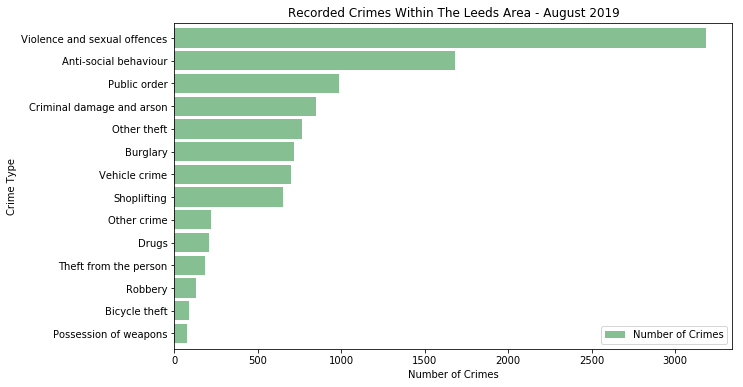

In [64]:
g1.plot(kind='barh', figsize=(10, 6), color='#86bf91', zorder=2, width=0.85)

plt.title('Recorded Crimes Within The Leeds Area - August 2019') # add a title to the histogram
plt.ylabel('Crime Type') # add y-label
plt.xlabel('Number of Crimes') # add x-label

plt.show()

In [12]:
# Venue Types

dfareavenueshigh.head()

,index,LSOA Code,Ward Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Cricket Ground,53.817558,-1.581799,Sports Venue
1,1,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley Carnegie Stadium,53.816773,-1.581986,Sports Venue
2,2,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Headingley South Stand,53.816262,-1.582183,Sports Venue
3,3,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Thai Sabai,53.820125,-1.580919,Restaurant
4,4,E01032945,Headingley & Hyde Park,53.819059,-1.585914,Cafe Lento,53.819964,-1.581115,Café Coffe Shop


In [24]:
# Venue Types

g2 = dfareavenueshigh.groupby( [ "Venue Category"] ).count()
#g1.reset_index(inplace=True)
g2.drop(g2.columns[[1,2,3,4,5,6,7]], axis = 1, inplace=True)
#g2 = g2.rename(columns={'index': 'Number of Venues'}, inplace=True)
g2.columns = ['Number of Venues']
g2.sort_values(by=['Number of Venues'], inplace=True)
g2.head()

,Number of Venues
Venue Category,
College University,6
Industry,11
Off Licence,18
Museum Gallery,18
Theatre / Cinema,25


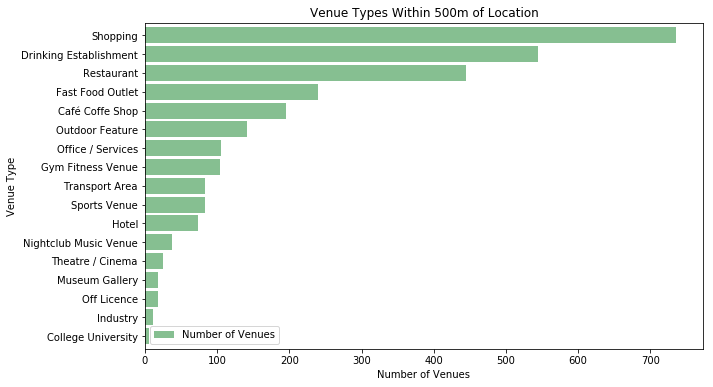

In [26]:
g2.plot(kind='barh', figsize=(10, 6), color='#86bf91', zorder=2, width=0.85)

plt.title('Venue Types Within 500m of Location') # add a title to the histogram
plt.ylabel('Venue Type') # add y-label
plt.xlabel('Number of Venues') # add x-label

plt.show()

In [8]:
# Map the data

mapcentre = 'Leeds, LS1'

geolocator = Nominatim(user_agent="leedsexplorer")
location = geolocator.geocode(mapcentre)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Leeds are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Leeds are 53.7974185, -1.5437941.


In [ ]:
# Prepare data for plotting

dfcount = dflscrime.groupby('LSOA name').count()[['Crime type']]
dfcount.reset_index(inplace=True)
dfcount.rename(columns ={'Crime type':'Count', 'LSOA name':'lsoa11nm'}, inplace=True)


In [57]:
# Map of Leeds

leeds_map = folium.Map(location=[latitude, longitude],width=600, height=400, zoom_start=8)


folium.Marker([latitude, longitude], popup='<i>Leeds</i>').add_to(leeds_map)

leeds_map

In [24]:
# Heat Map of Crimes

heat_df = dflscrime[['Latitude', 'Longitude']]

map = folium.Map([latitude, longitude], width=600, height=400,  zoom_start=10)


# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data,radius=11).add_to(map)

#HeatMap(heat_data,radius=25, min_opacity = 0.4, max_val = 50, gradient={.6: 'blue', .98: 'lime', 1: 'red'}).add_to(map)


map

In [48]:
# Map of Geopraphic Points used in analysis

map2 = folium.Map([latitude, longitude],height=400, width=600, zoom_start=10)

# add markers to map
for lat, lng in zip(dfleedslatlon['Latitude'], dfleedslatlon['Longitude']):
    label = '{}, {}'.format(lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        #popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        clustered_markers = True,
        parse_html=False).add_to(map2)  
    
map2


In [49]:
# Retrieve Data

query = %sql SELECT * FROM dfareacrimetype;
df = query.DataFrame()
df.head()

 * ibm_db_sa://qml22795:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


,index,LSOA Code,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
0,0,E01011264,1,0,0,3,0,0,2,0,0,0,15,0,1,9
1,1,E01011265,2,0,2,2,0,0,2,0,1,1,7,0,5,11
2,2,E01011266,2,0,1,1,0,0,2,0,0,0,0,0,1,0
3,3,E01011267,4,0,0,3,1,0,2,0,1,0,1,0,4,8
4,4,E01011268,1,0,0,5,0,0,2,0,3,0,0,0,4,18


In [50]:
# Remove columns not required for analysis

df.drop(df.columns[[0,1]], axis = 1, inplace=True)
df.head()

,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
0,1,0,0,3,0,0,2,0,0,0,15,0,1,9
1,2,0,2,2,0,0,2,0,1,1,7,0,5,11
2,2,0,1,1,0,0,2,0,0,0,0,0,1,0
3,4,0,0,3,1,0,2,0,1,0,1,0,4,8
4,1,0,0,5,0,0,2,0,3,0,0,0,4,18


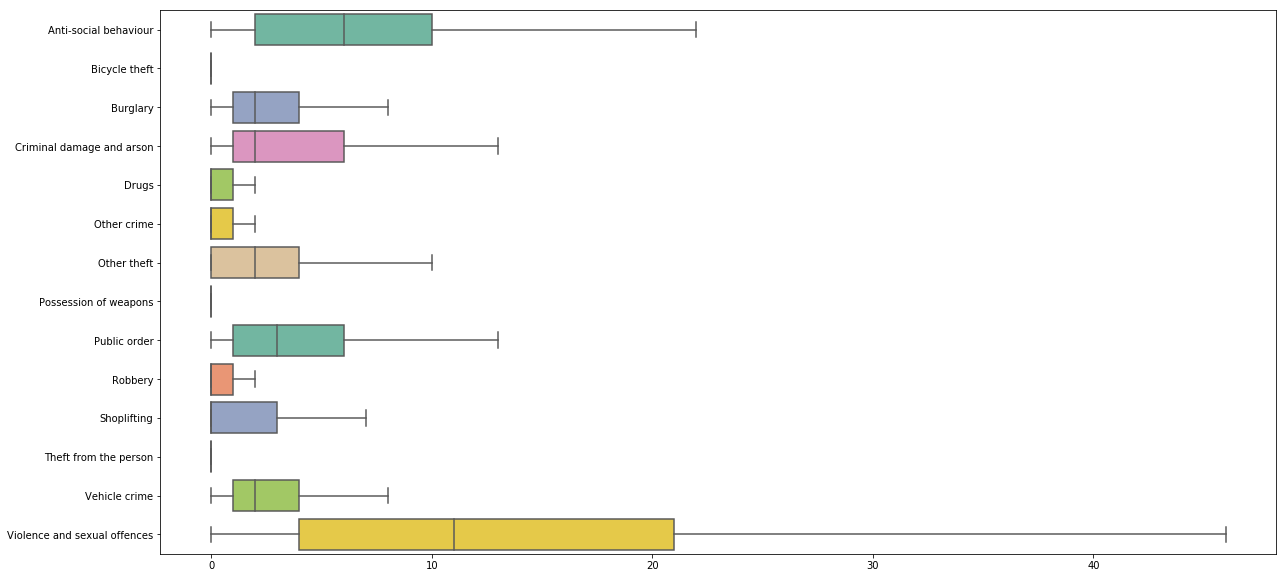

In [55]:
# Examine Data Distribution of crimes

plt.figure(figsize=(20, 10))

bp = df
ax = sns.boxplot(data=df, orient="h", palette="Set2", showfliers=False)

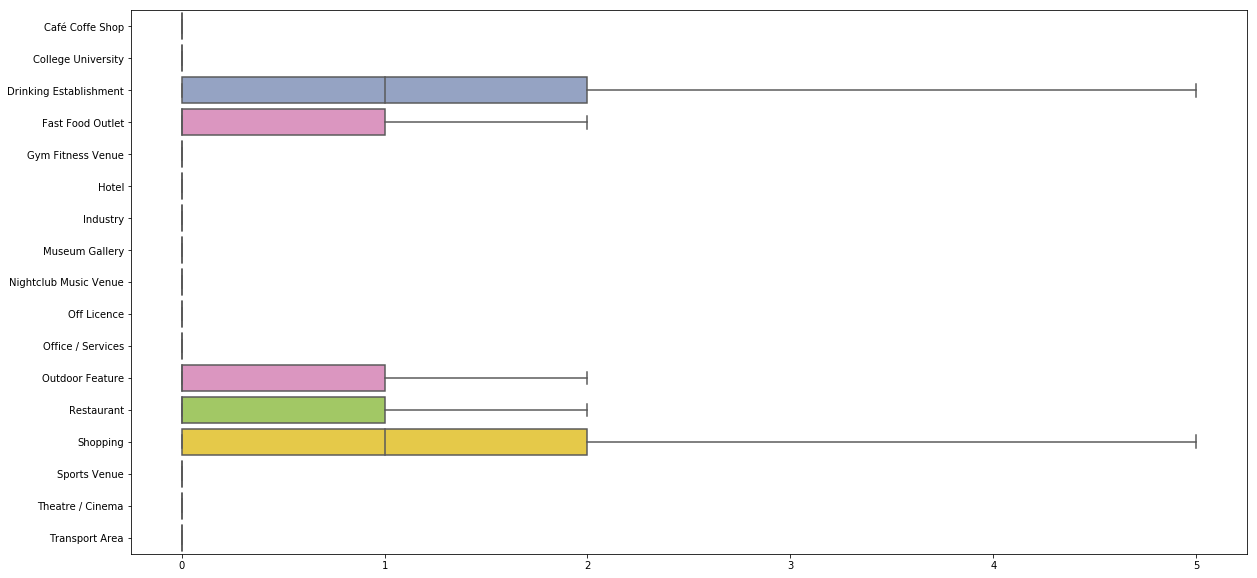

In [48]:
# Examine Data Distribution of Venues

dfhlAreaLocationType = harealoc_onehot.groupby('LSOA Code').agg('sum').reset_index()

plt.figure(figsize=(20, 10))

bp = dfhlAreaLocationType
ax = sns.boxplot(data=bp, orient="h", palette="Set2", showfliers=False)




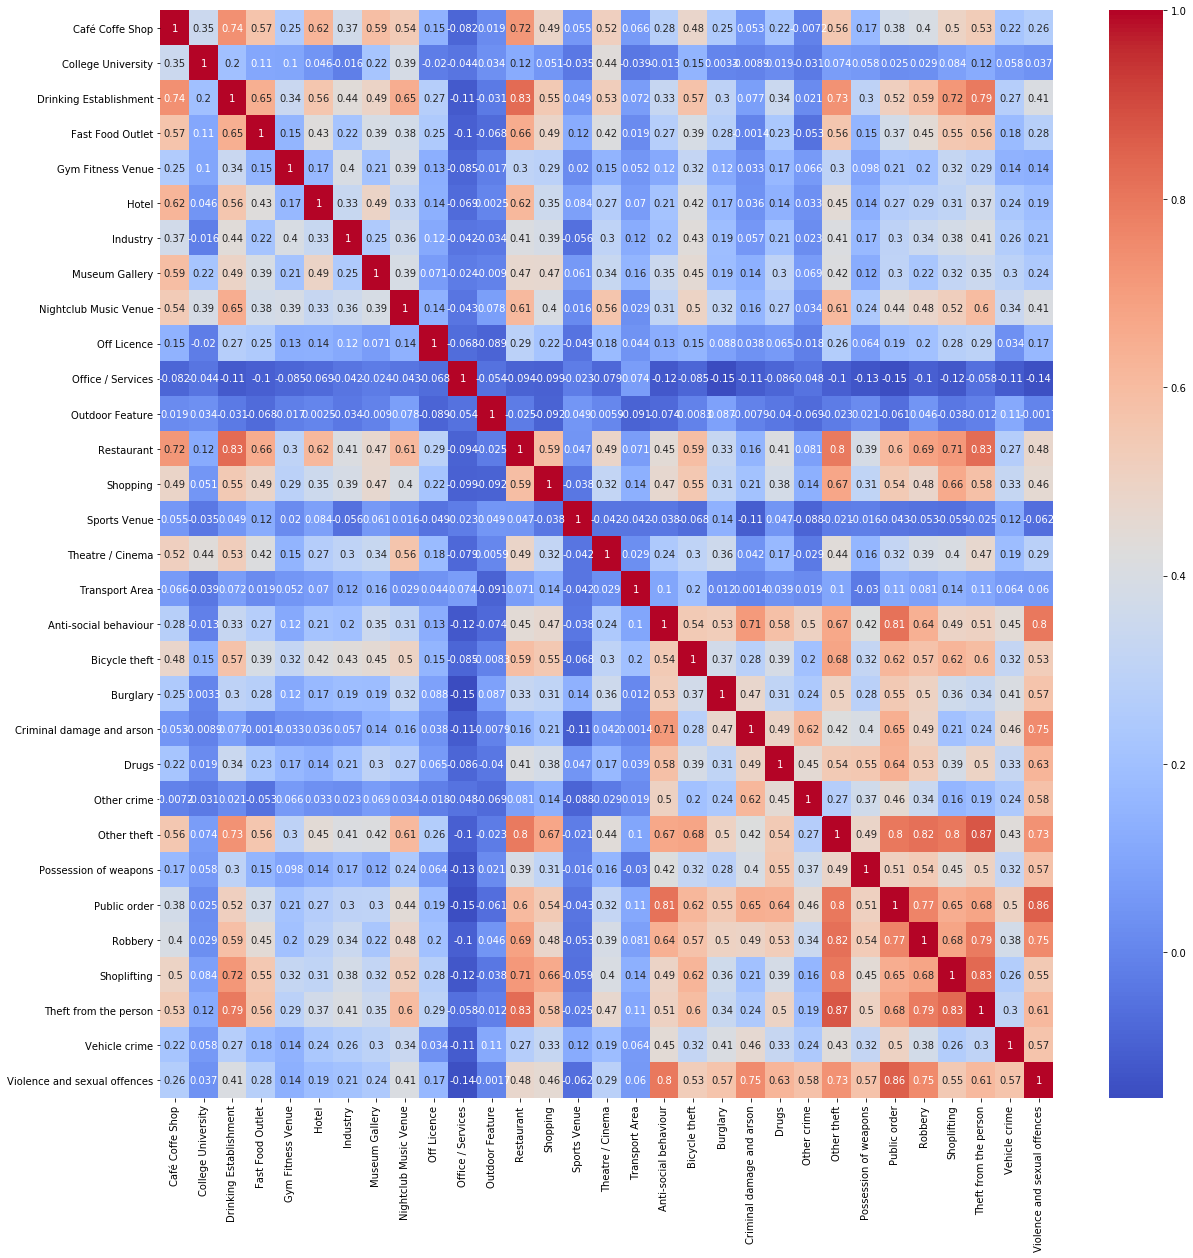

In [90]:
# View Correlations between crimes and venues

plt.figure(figsize=(20,20))
sns.heatmap(dhlfscaled.corr(),cmap='coolwarm', annot=True)

In [55]:
corr

College University        0.036585
Drinking Establishment    0.407979
Fast Food Outlet          0.275590
Gym Fitness Venue         0.135271
Hotel                     0.188670
Industry                  0.207387
Museum Gallery            0.244947
Nightclub Music Venue     0.405460
Off Licence               0.169541
Office / Services        -0.142864
Outdoor Feature          -0.001670
Restaurant                0.475207
Shopping                  0.457681
Sports Venue             -0.062255
Theatre / Cinema          0.285926
Transport Area            0.060130
Name: Violence and sexual offences, dtype: float64

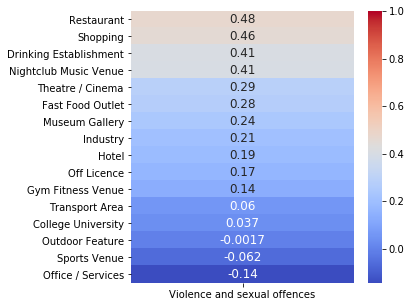

In [74]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Violence and sexual offences'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

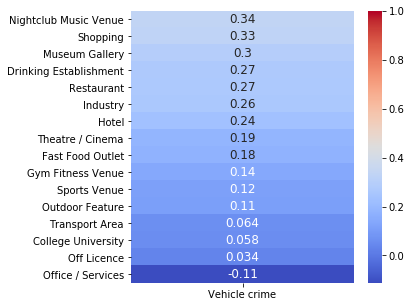

In [75]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Vehicle crime'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

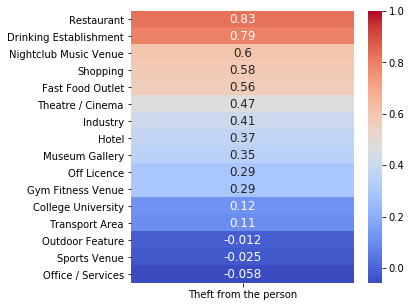

In [76]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Theft from the person'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

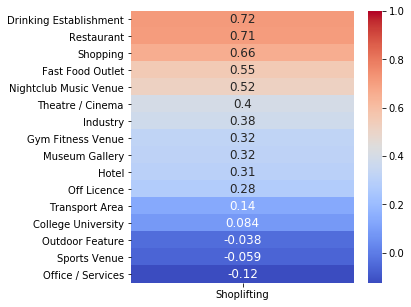

In [77]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Shoplifting'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

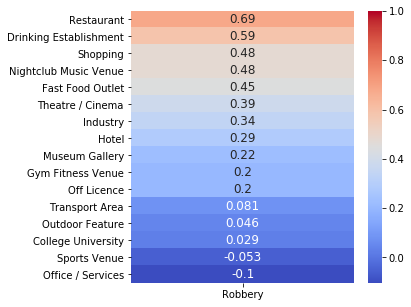

In [78]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Robbery'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

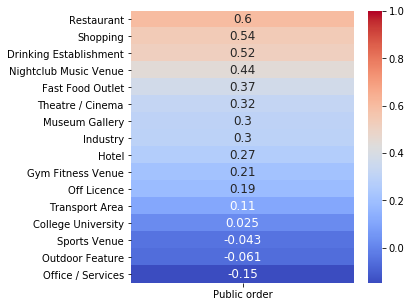

In [79]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Public order'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

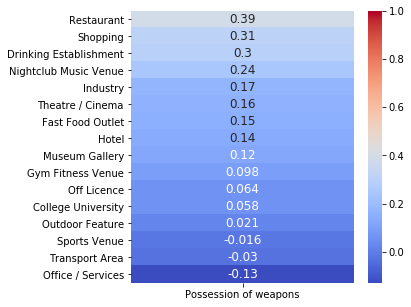

In [80]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Possession of weapons'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

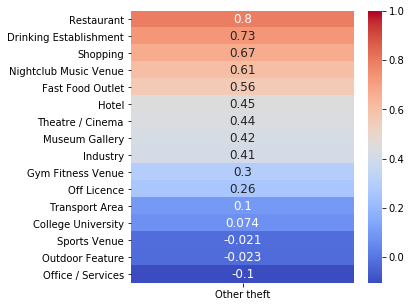

In [81]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Other theft'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

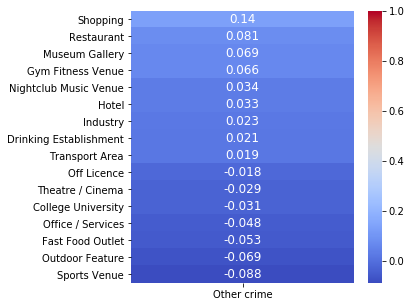

In [82]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Other crime'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

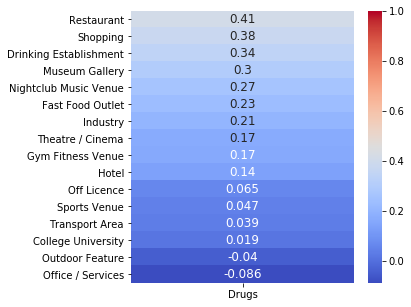

In [84]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Drugs'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

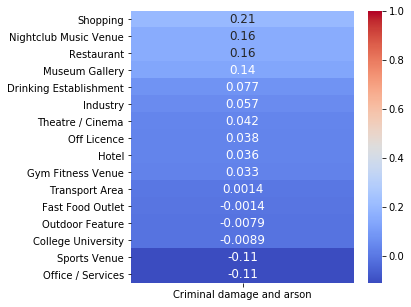

In [85]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Criminal damage and arson'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

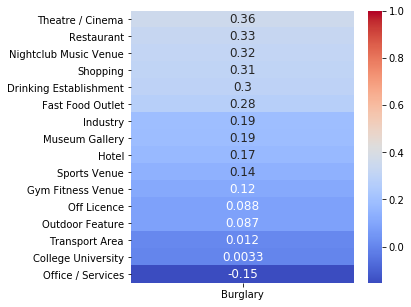

In [86]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Burglary'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

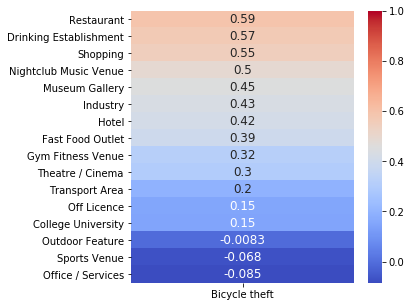

In [87]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Bicycle theft'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

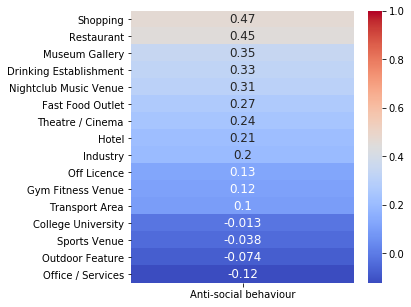

In [88]:
corr = dhlfscaled[dhlfscaled.columns[1:32]].corr()['Anti-social behaviour'][:-14]
corr.sort_values(ascending=False, inplace=True)
#set fig size
fig, ax = plt.subplots(figsize=(5,5))
#plot matrix
sns.heatmap(corr.to_frame(),annot=True, vmax=1, annot_kws={'size':12},cmap="coolwarm")
plt.show();

---

## 8. Classification Model

Prepare data and create classification model

---

In [17]:
# Create Classification Columns

dhlfscaled['Theft from the person Level'] = dhlfscaled['Theft from the person']
dhlfscaled['Other Theft Level'] = dhlfscaled['Other theft']
dhlfscaled['Public Order Level'] = dhlfscaled['Public order']
dhlfscaled['Robbery Level'] = dhlfscaled['Robbery']

In [18]:
# Set Classification

avTheftFromThePerson = dhlfscaled['Theft from the person Level'].mean()
avOtherTheft = dhlfscaled['Other Theft Level'].mean()
avPublicOrder = dhlfscaled['Public Order Level'].mean()
avRobbery = dhlfscaled['Robbery Level'].mean()

dhlfscaled.loc[dhlfscaled['Theft from the person'] < avTheftFromThePerson, 'Theft from the person Level'] = 'Low'
dhlfscaled.loc[dhlfscaled['Theft from the person'] >= avTheftFromThePerson, 'Theft from the person Level'] = 'High'

dhlfscaled.loc[dhlfscaled['Other theft'] < avOtherTheft, 'Other Theft Level'] = 'Low'
dhlfscaled.loc[dhlfscaled['Other theft'] >= avOtherTheft, 'Other Theft Level'] = 'High'

dhlfscaled.loc[dhlfscaled['Public order'] < avPublicOrder, 'Public Order Level'] = 'Low'
dhlfscaled.loc[dhlfscaled['Public order'] >= avPublicOrder, 'Public Order Level'] = 'High'

dhlfscaled.loc[dhlfscaled['Robbery'] < avRobbery, 'Robbery Level'] = 'Low'
dhlfscaled.loc[dhlfscaled['Robbery'] >= avRobbery, 'Robbery Level'] = 'High'

dhlfscaled.head()

,Café Coffe Shop,College University,Drinking Establishment,Fast Food Outlet,Gym Fitness Venue,Hotel,Industry,Museum Gallery,Nightclub Music Venue,Off Licence,...,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Theft from the person Level,Other Theft Level,Public Order Level,Robbery Level
0,-0.362710,-0.099394,0.691850,-0.488475,-0.382767,-0.21905,-0.156521,-0.191057,-0.22711,-0.201802,...,-0.805859,-0.429024,1.776445,-0.175687,-0.569666,-0.395243,Low,Low,Low,Low
1,0.492913,-0.099394,0.691850,0.447769,-0.382767,-0.21905,-0.156521,-0.191057,-0.22711,-0.201802,...,-0.634161,0.185777,0.626521,-0.175687,0.536015,-0.274718,Low,Low,Low,High
2,-0.362710,-0.099394,-0.067699,1.384013,1.310241,-0.21905,-0.156521,-0.191057,-0.22711,-0.201802,...,-0.805859,-0.429024,-0.379662,-0.175687,-0.569666,-0.937604,Low,Low,Low,Low
3,-0.362710,-0.099394,-0.067699,-0.488475,-0.382767,-0.21905,-0.156521,-0.191057,-0.22711,-0.201802,...,-0.634161,-0.429024,-0.235922,-0.175687,0.259595,-0.455505,Low,Low,Low,Low
4,-0.362710,-0.099394,-0.447473,-0.488475,-0.382767,-0.21905,-0.156521,-0.191057,-0.22711,-0.201802,...,-0.290766,-0.429024,-0.379662,-0.175687,0.259595,0.147119,Low,Low,Low,Low


In [19]:
# Select Features - Feature Set X

Feature = dhlfscaled[['Restaurant','Drinking Establishment','Nightclub Music Venue','Fast Food Outlet','Shopping']]

X = Feature
X[0:5]

,Restaurant,Drinking Establishment,Nightclub Music Venue,Fast Food Outlet,Shopping
0,-0.396248,0.691850,-0.22711,-0.488475,-0.897257
1,0.424806,0.691850,-0.22711,0.447769,0.227370
2,-0.396248,-0.067699,-0.22711,1.384013,-0.334943
3,0.014279,-0.067699,-0.22711,-0.488475,0.227370
4,-0.396248,-0.447473,-0.22711,-0.488475,-0.897257


### Apply Model - Theft From The Person

In [20]:
# Label Set Y Theft From The Person

y = dhlfscaled['Theft from the person Level'].values
y[0:5]

array(['Low', 'Low', 'Low', 'Low', 'Low'], dtype=object)

In [21]:
# Generate Test and Training Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(368, 5) (368,)
(92, 5) (92,)


In [22]:
# Determine best K

Kno = 25
mean_acc = np.zeros((Kno-1))
std_acc = np.zeros((Kno-1))
ConfustionMx = [];
for n in range(1,Kno):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
    

array([0.80434783, 0.73913043, 0.85869565, 0.83695652, 0.88043478,
       0.85869565, 0.86956522, 0.88043478, 0.86956522, 0.88043478,
       0.86956522, 0.85869565, 0.83695652, 0.84782609, 0.81521739,
       0.82608696, 0.83695652, 0.84782609, 0.83695652, 0.83695652,
       0.83695652, 0.84782609, 0.83695652, 0.83695652])

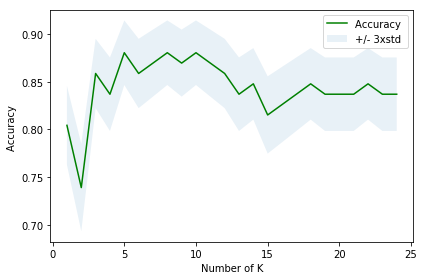

In [23]:
# Ascertain best K

plt.plot(range(1,Kno),mean_acc,'g')
plt.fill_between(range(1,Kno),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show()

In [24]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8804347826086957 with k= 5


**Apply Model:**

In [26]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)

In [33]:
knn_yhat = knn.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.88
KNN F1-score: 0.86


### Apply Model - Other Theft

In [34]:
# Label Set Y Other Theft

y = dhlfscaled['Other Theft Level'].values
y[0:5]

array(['Low', 'Low', 'Low', 'Low', 'Low'], dtype=object)

In [35]:
# Generate Test and Training Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(368, 5) (368,)
(92, 5) (92,)


In [36]:
# Determine best K

Kno = 25
mean_acc = np.zeros((Kno-1))
std_acc = np.zeros((Kno-1))
ConfustionMx = [];
for n in range(1,Kno):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67391304, 0.60869565, 0.79347826, 0.7826087 , 0.81521739,
       0.82608696, 0.82608696, 0.82608696, 0.80434783, 0.80434783,
       0.80434783, 0.79347826, 0.79347826, 0.80434783, 0.7826087 ,
       0.79347826, 0.79347826, 0.79347826, 0.7826087 , 0.79347826,
       0.77173913, 0.77173913, 0.77173913, 0.79347826])

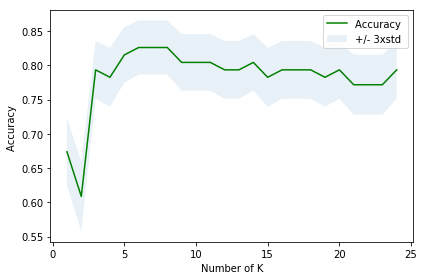

In [37]:
# Ascertain best K

plt.plot(range(1,Kno),mean_acc,'g')
plt.fill_between(range(1,Kno),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8260869565217391 with k= 6


**Apply Model:**

In [39]:
knn = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)

In [40]:
knn_yhat = knn.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.83
KNN F1-score: 0.82


### Apply Model - Public Oder

In [54]:
# Label Set Y Public Order

y = dhlfscaled['Public Order Level'].values
y[0:5]

array(['Low', 'Low', 'Low', 'Low', 'Low'], dtype=object)

In [55]:
# Generate Test and Training Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(368, 5) (368,)
(92, 5) (92,)


In [56]:
# Determine best K

Kno = 25
mean_acc = np.zeros((Kno-1))
std_acc = np.zeros((Kno-1))
ConfustionMx = [];
for n in range(1,Kno):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.5326087 , 0.55434783, 0.56521739, 0.57608696, 0.64130435,
       0.55434783, 0.59782609, 0.59782609, 0.63043478, 0.56521739,
       0.64130435, 0.59782609, 0.63043478, 0.61956522, 0.67391304,
       0.61956522, 0.61956522, 0.57608696, 0.59782609, 0.59782609,
       0.59782609, 0.59782609, 0.66304348, 0.61956522])

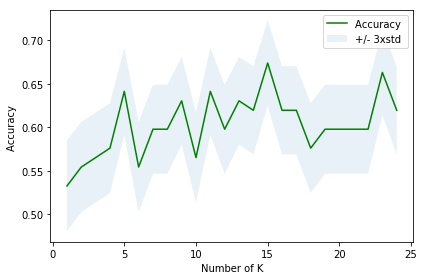

In [57]:
# Ascertain best K

plt.plot(range(1,Kno),mean_acc,'g')
plt.fill_between(range(1,Kno),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show()

In [58]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6739130434782609 with k= 15


**Apply Model:**

In [59]:
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train,y_train)

In [60]:
knn_yhat = knn.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.67
KNN F1-score: 0.64


### Apply Model - Robbery

In [61]:
# Label Set Y Robbery

y = dhlfscaled['Robbery Level'].values
y[0:5]

array(['Low', 'High', 'Low', 'Low', 'Low'], dtype=object)

In [62]:
# Generate Test and Training Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(368, 5) (368,)
(92, 5) (92,)


In [63]:
# Determine best K

Kno = 25
mean_acc = np.zeros((Kno-1))
std_acc = np.zeros((Kno-1))
ConfustionMx = [];
for n in range(1,Kno):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.63043478, 0.59782609, 0.69565217, 0.57608696, 0.68478261,
       0.63043478, 0.66304348, 0.65217391, 0.66304348, 0.64130435,
       0.65217391, 0.67391304, 0.69565217, 0.66304348, 0.68478261,
       0.68478261, 0.68478261, 0.68478261, 0.67391304, 0.68478261,
       0.69565217, 0.68478261, 0.65217391, 0.65217391])

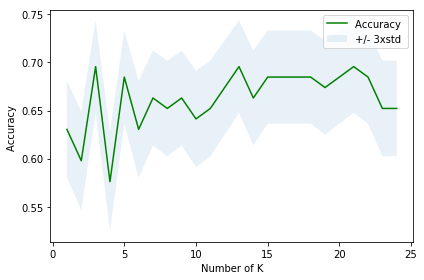

In [64]:
# Ascertain best K

plt.plot(range(1,Kno),mean_acc,'g')
plt.fill_between(range(1,Kno),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K')
plt.tight_layout()
plt.show()

In [65]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6956521739130435 with k= 3


**Apply Model:**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)

In [66]:
knn_yhat = knn.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.65
KNN F1-score: 0.58


---

## 9. Summary Of Test Accuracy

Summary of the Test Model Accuracy

---

In [9]:
res = [['Theft From The Person',0.88,0.86],['Other Theft',0.83,0.82],['Public Order',0.67,0.64],['Robbery',0.65,0.58]]

dfres = pd.DataFrame(res, columns = ['Crime Type','Jaccard','F1 Score'])
dfres

,Crime Type,Jaccard,F1 Score
0,Theft From The Person,0.88,0.86
1,Other Theft,0.83,0.82
2,Public Order,0.67,0.64
3,Robbery,0.65,0.58


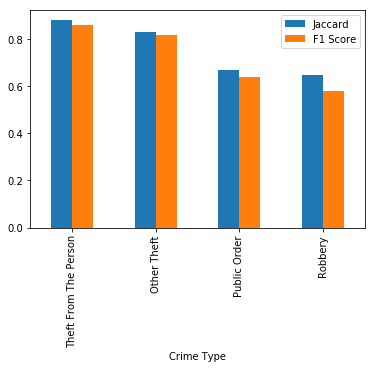

In [13]:
dfres.plot(x="Crime Type", y=["Jaccard", "F1 Score"], kind="bar")